In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
_0coupon = pd.read_excel('Data/0CouponBondYield.xlsx')
TTM = _0coupon['TTM'].values
market_prices = _0coupon['BondPrice'].values

In [3]:
def cir_bond_price(T, a, b, sigma, r0):
    """
    Calculate the price of a zero-coupon bond using the CIR model.
    """
    g = np.sqrt(a**2 + 2 * sigma**2)
    exp_gt = np.exp(g * T)

    B = (2 *(exp_gt - 1)) / ((g + a) * (exp_gt - 1) + 2*g)
    A = ((2 * g * np.exp((a + g) * T / 2)) / ((g+a)*(np.exp(g * T) - 1) + 2*g))**(2*a*b / sigma**2)

    return A * np.exp(-B * r0)

In [4]:
def loss(params):
    a,b,sigma,r0 = params
    if a <= 0 or b <= 0 or sigma <= 0:
        return 1e10
    model_prices = np.array([cir_bond_price(t, a,b,sigma,r0) for t in TTM])
    return np.mean((model_prices - market_prices) ** 2)

In [5]:
initial_guess = [0.1, 0.03, 0.03, 0.04] 
bounds = [(1e-4, 5), (1e-4, 0.2), (1e-4, 0.5), (0, 0.1)]


result = minimize(loss, initial_guess, bounds=bounds)

a_opt, b_opt, sigma_opt, r0_opt = result.x
print(f"Optimal Parameters:\na={a_opt:.4f}, b={b_opt:.4f}, sigma={sigma_opt:.4f}, r0={r0_opt:.4f}")

Optimal Parameters:
a=0.1290, b=0.0591, sigma=0.0470, r0=0.0343


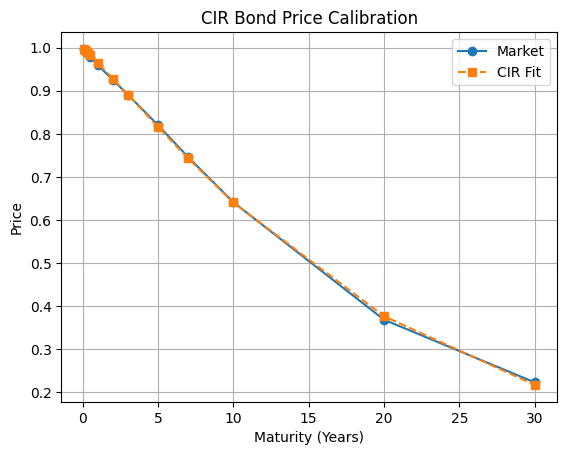

In [6]:
fitted_prices = [cir_bond_price(t, a_opt, b_opt, sigma_opt, r0_opt) for t in TTM]

plt.plot(TTM, market_prices, 'o-', label='Market')
plt.plot(TTM, fitted_prices, 's--', label='CIR Fit')
plt.title('CIR Bond Price Calibration')
plt.xlabel('Maturity (Years)')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
error = np.array(fitted_prices) - market_prices
rmse = np.sqrt(np.mean(error**2))
print(f"RMSE: {rmse:.6f}")

RMSE: 0.003847
